# Abstract 

La posibilidad que brindan los sistemas automatizados de decision y clasificacion son sobresalientes al producir mejoras de producto y reducir costos o aumentar ganacias, de manera sistematica y eficaz. Muchas empresas relacionadas al juego y apuestas utilizan esto para predecir numeros ante la gran cantidad de datos que se nos brinda dados en el dataset. Asi mismo , el cliente propone una solucion practica ante las circunstacias economicas que atraviesa.

En base a esta informacion , se puede hacer una investigacion y resolver las practicas beneficiosas de los jugadores y del equipo en cada uno de los juegos, es decir , es posible hacer preguntas y responderlas para obtener nuevos conocimientos sobre los equipos, los jugadores y la competencia en sí. Por ejemplo, se puede analizar la tendencia de los equipos en casa y fuera de casa, las estadísticas de los jugadores en diferentes momentos del partido, o el porcentaje de victorias y derrotas de los equipos.

Este proyecto se basara en utilizar los datos disponibles para encontrar las diferencias y probrabilidades en cada partido dado durante los años jugados por la NBA. El objetivo se centrara en poder adquirir una variable que determine un numero en el cual se basara la cuota cobrada por el sistema de apuestas. Ademas , este analisis proovera al cliente con el gran beneficio del conocimiento y la ventaja por sobre la competencia , o hacia los mismos usuarios de la plataforma.

Asi, lo visto durante un analisis exploratorio de los datos y las caracteristicas del conjunto , se plantearan las primeras hipotesis para luego establecer un modelo predictivo de los datos de interes. Luego de un resultado final , se podra verificar el uso de las herramientas y las capacidades un sistema de ML.

# Introduccion Segunda Entrega

En la entrega anterior se llego a un modelo de tiempo real que es totalmente aplicable para un partido normal de baloncesto. El modelo anticipa una cuota para cada minuto que pasa (o minutos) y automatizar el proceso de calculo necesario durante cada partido.

Esto se puede ver en las siguientes imagenes que demuestran la funcion que realiza el modelo por cada minuto que pasa en los partidos:

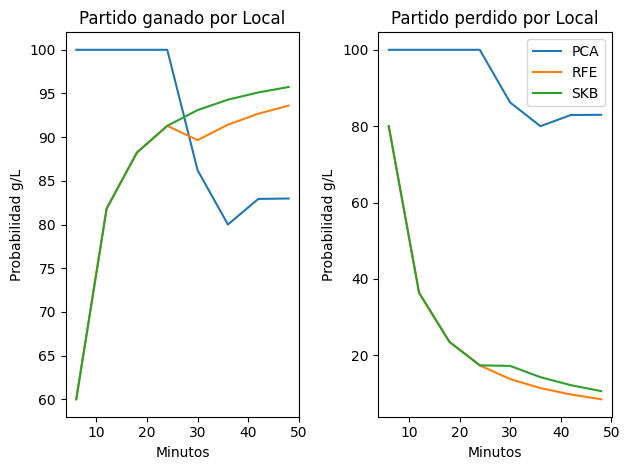

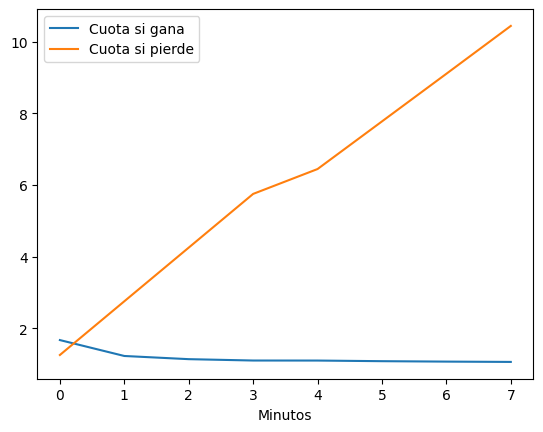

A pesar del buen rendimiento del modelo, se puede notar que el modelo tiene 2 problemas que anteceden a su aplicacon:

**- El modelo toma la probabilidad estadistica de ser local unicamente**

**- El modelo no predice de forma fiable al inicio del partido (primer cuarto)**

Esto trae una falla en la logica de la aplicacion porque en todos los partidos **existe la posibilidad de ganar por el rendimiento del equipo** y no solo por la **estadistica de local/visitante**.

Es asi que en esta entrega se intentara realizar un proceso mas complejo para poder realizar un algoritmo mas avanzado y obtener resultados mas precisos , y como tanto se buscaba.. ¡La posibilidad de utilizar un **modelo totalmente desatendido y automatico**!

## Contexto analitico

Ademas del dataset compartido por el cliente , se tomo la desicion de extraer de fuentes externas nueva informacion para poder obtener *insights* que deseamos obtener debido a que el dataset ("games.csv") no provee esta informacion.

Una manera de acceder al rendimiento de los equipos por temporada podria ser el analisis de la temporada anterior para saber el comportamiento de las temporadas futuras .

Por ejemplo , si el equipo tuvo un buen rendimiento en la temporada pasada , se puede esperar que tenga el mismo rendimiento al inicio de la actual

Esto podria corregir la variable independiente 'p' que determina la posibilidad de ganar del locar en cada minuto que pasa. Una posibilidad podria ser que actue durante el inicio del primer cuarto (que es donde el modelo es menos confiable). 

Esto se podra analizar visualizando parte de la misma informacion del dataset pasado usando una estrategia distinta de visualizacion.

Para finalizar , se validara con datos extraidos de la API publica brindada por *"Ball don't lie"* , que a pesar de ser una API NO OFICIAL, nos permitira obtener algunos datos relevantes de las temporadas que no tenemos en el dataset de nuestro proyecto. Su website es "https://www.balldontlie.io/home.html#introduction" en la que se encuentra la manera de realizar "querys" a su url.

Estos datos fueron estructurados en un dataset con formato ".csv" (games_2022.csv) para no reutilizar de forma repetitiva la API ademas de ser mas optimo en el codigo. Se incluira una breve descripcion del mismo:

### Descripcion de DataSet (games_2022.csv)
Contiene los datos de los juegos de la NBA en la ultima temporada (2022). Este posee 1299 filas de datos y 7 columnas con los siguientes datos:

game_id: Identificación única del juego.

game_date: Fecha del juego en formato "YYYY-MM-DD".

game_home_team: Nombre del equipo local (equipo que juega en su propia cancha).

game_home_team_score: Puntuación del equipo local en ese juego.

game_SEASON: Temporada del juego.

game_visitor_team: Nombre del equipo visitante (equipo que juega fuera de casa).

game_visitor_team_score: Puntuación del equipo visitante en ese juego.

# Desarrollo del código:

In [98]:
#Cargar librerias principales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import warnings
# Suprimir las advertencias para futuros usos
warnings.filterwarnings("ignore")

In [99]:
#Acceso al dataset y armado del dataframe base
os.chdir('D:/Documents/GitHub/NBA_games_analitycs/data')
ds_path='clean_games.csv'
df = pd.read_csv(ds_path)
#Acceso al dataset con juegos del 2022 y armado del dataframe correspondiente
ds_path='games_2022.csv'
df_2022 = pd.read_csv(ds_path)

## Limpieza de datos (Data Wrangling)

Recordemos que la informacion del dataset "games.csv" ya se encuentra filtrada desde la primer entrega.

La informacion del dataset adicional ya ha sido filtrada de datos atipicos y nulos.

In [100]:
#Informacion basica del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     25697 non-null  object 
 1   GAME_ID           25697 non-null  int64  
 2   GAME_STATUS_TEXT  25697 non-null  object 
 3   SEASON            25697 non-null  int64  
 4   TEAM_ID_home      25697 non-null  int64  
 5   PTS_home          25697 non-null  float64
 6   FG_PCT_home       25697 non-null  float64
 7   FT_PCT_home       25697 non-null  float64
 8   FG3_PCT_home      25697 non-null  float64
 9   AST_home          25697 non-null  float64
 10  REB_home          25697 non-null  float64
 11  TEAM_ID_away      25697 non-null  int64  
 12  PTS_away          25697 non-null  float64
 13  FG_PCT_away       25697 non-null  float64
 14  FT_PCT_away       25697 non-null  float64
 15  FG3_PCT_away      25697 non-null  float64
 16  AST_away          25697 non-null  float6

In [101]:
#Informacion basica del dataframe complementario
print(df_2022.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GAME_ID        1320 non-null   int64 
 1   GAME_DATE_EST  1320 non-null   object
 2   TEAM_ID_home   1320 non-null   int64 
 3   PTS_home       1320 non-null   int64 
 4   SEASON         1320 non-null   int64 
 5   TEAM_ID_away   1320 non-null   int64 
 6   PTS_away       1320 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 72.3+ KB
None


A simple viste se puede notar que se le dio formato similar al dataset complementario.

Se modificara la variable 'TEAM_ID_home' y 'TEAM_ID_awy para simplificar la visualizacion de los equipos en las graficas siguientes y tablas:

In [102]:
# Define la codificación alfabética
equipos = {}
equipo_actual = 'A'

# Itera sobre las filas del DataFrame y realiza los cambios en las columnas HOME_TEAM_ID y VISITOR_TEAM_ID
for index, row in df.iterrows():
    home_team_id = row['TEAM_ID_home']
    visitor_team_id = row['TEAM_ID_away']
    
    # Verifica si el equipo ya está codificado, si no, le asigna una nueva letra
    if home_team_id not in equipos:
        equipos[home_team_id] = equipo_actual
        equipo_actual = chr(ord(equipo_actual) + 1)
    
    if visitor_team_id not in equipos:
        equipos[visitor_team_id] = equipo_actual
        equipo_actual = chr(ord(equipo_actual) + 1)
    
    # Actualiza los valores de los nombres de los equipos en las columnas correspondientes
    df.at[index, 'TEAM_ID_home'] = equipos[home_team_id]
    df.at[index, 'TEAM_ID_away'] = equipos[visitor_team_id]
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,2021,A,104.0,0.398,0.760,0.333,23.0,53.0,B,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,2021,C,101.0,0.443,0.933,0.429,20.0,46.0,D,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,2021,E,108.0,0.412,0.813,0.324,28.0,52.0,F,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,2021,G,122.0,0.484,0.933,0.400,33.0,55.0,H,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,2021,I,115.0,0.551,0.750,0.407,32.0,39.0,J,127.0,0.471,0.760,0.387,28.0,50.0,0


Ahora los equipos estaran formados desde el simbolo **'A'** hasta **'^'**

# Pre-analisis exploratorio de datos (EDA)

Agruparemos la victoria por equipos por temporada para visualizar como se comportan y en que posicion de la tabla quedaron al final de cada una

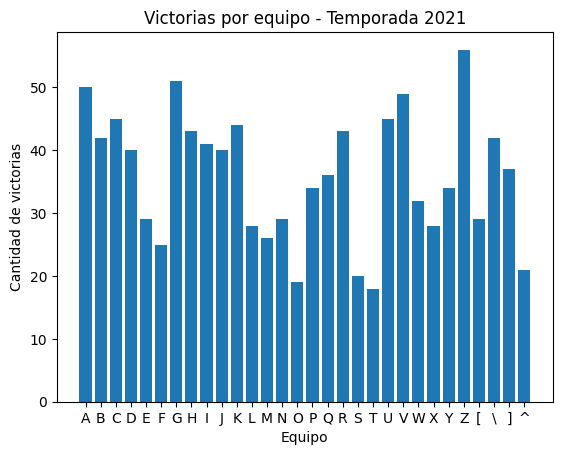

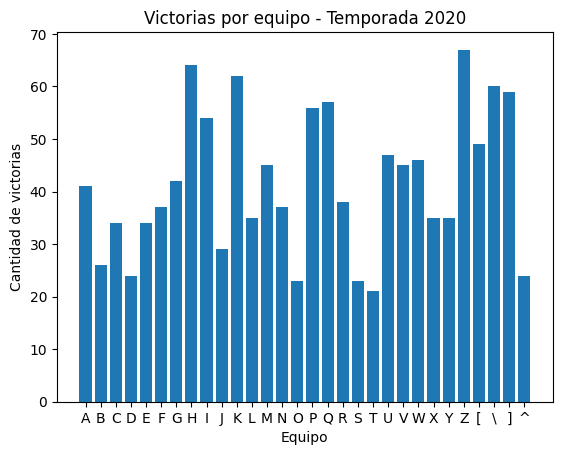

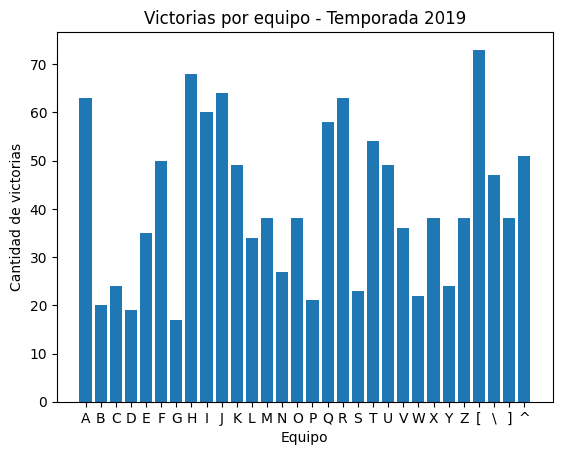

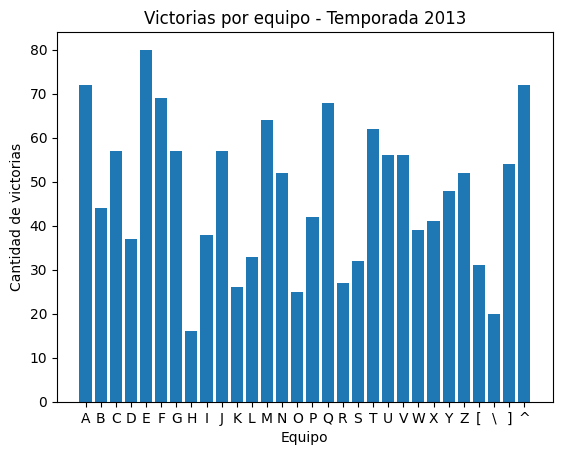

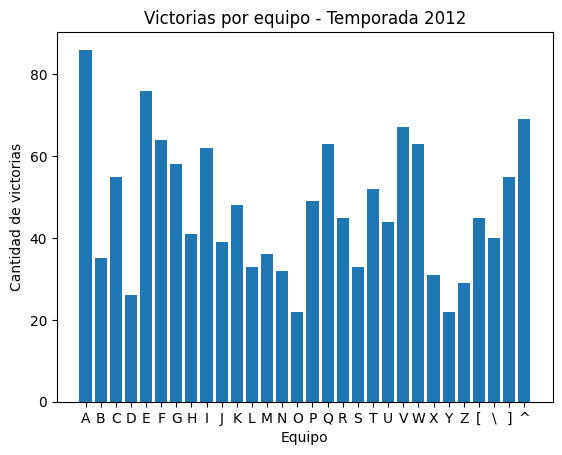

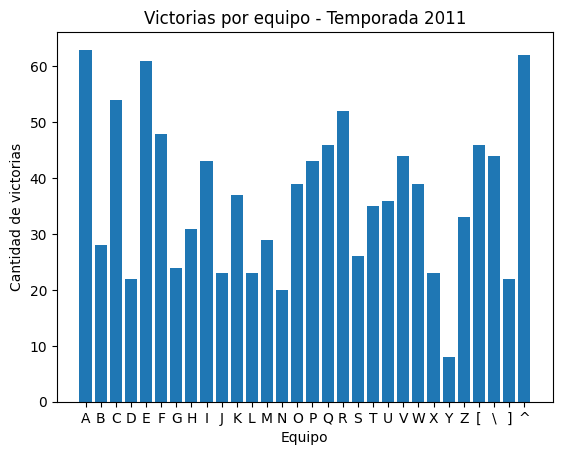

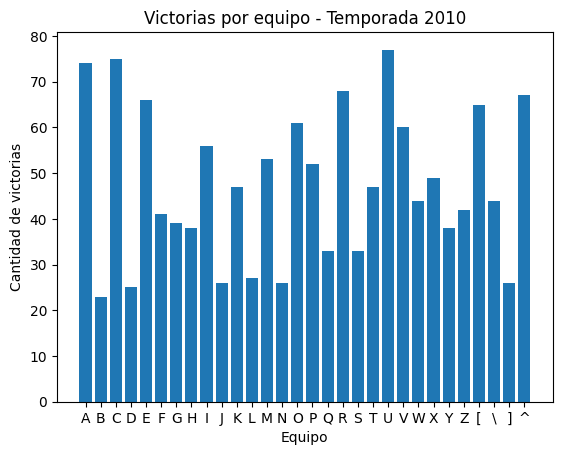

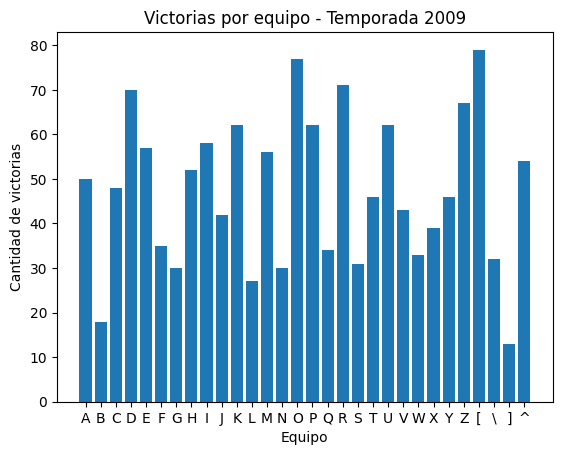

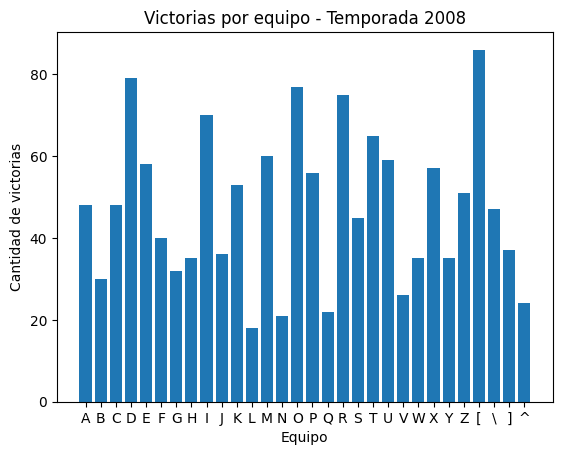

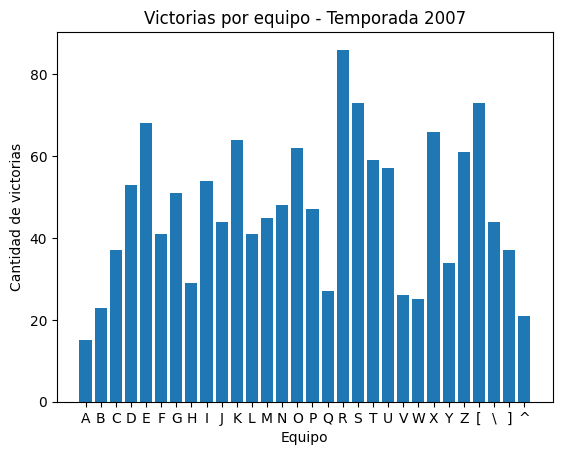

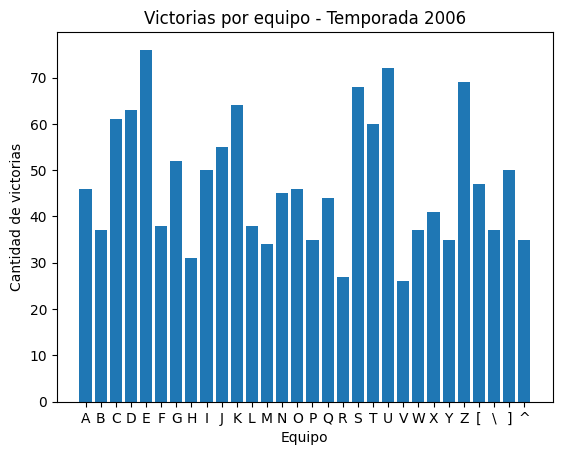

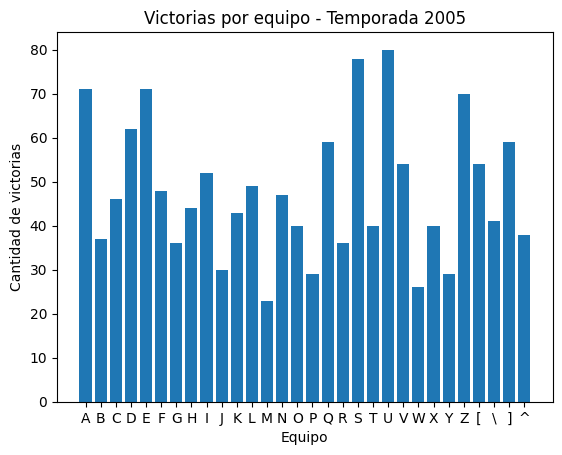

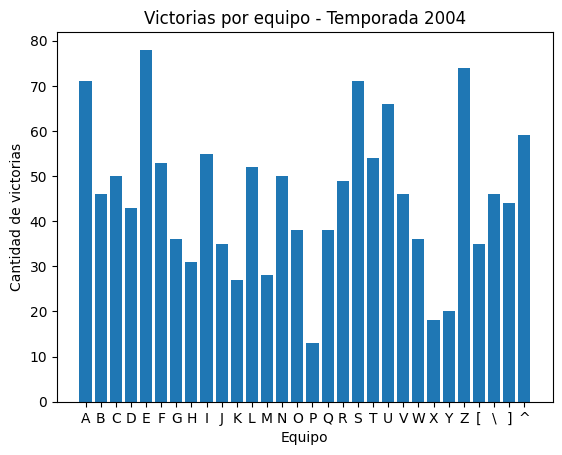

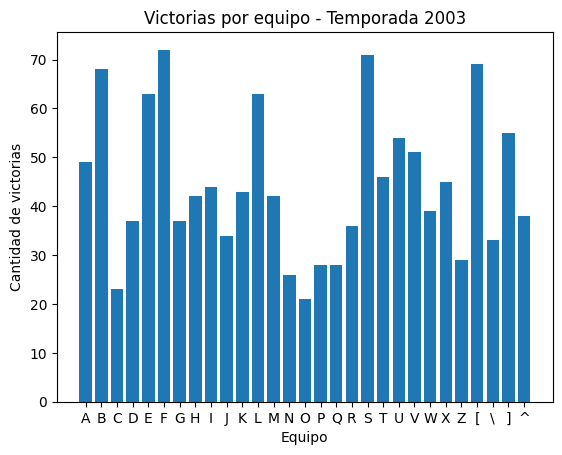

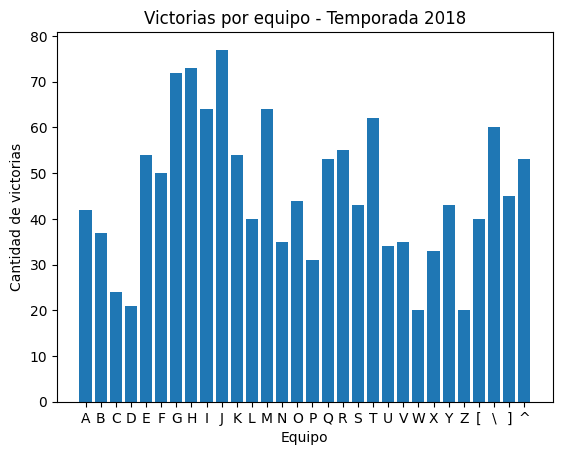

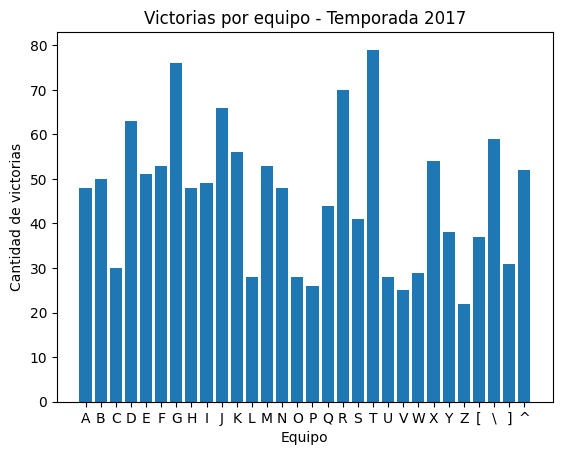

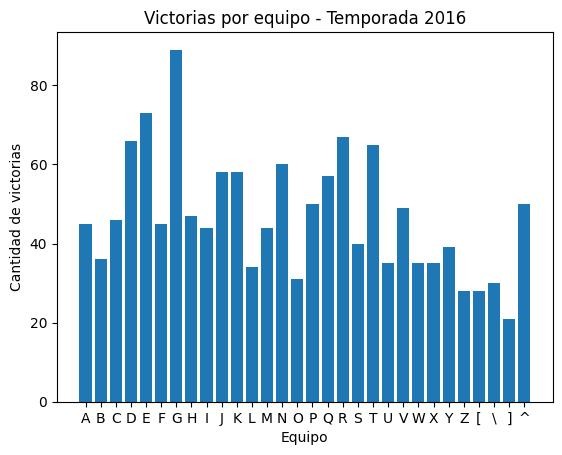

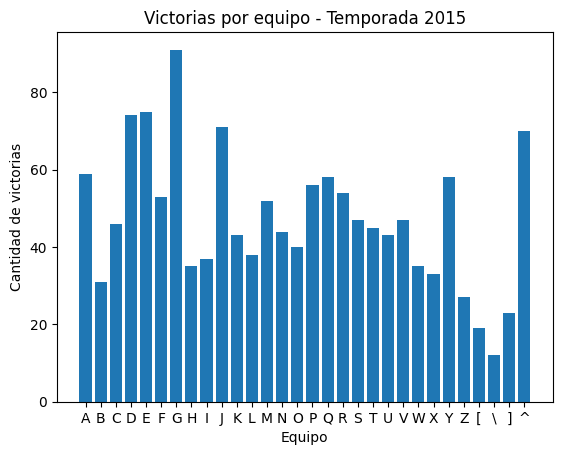

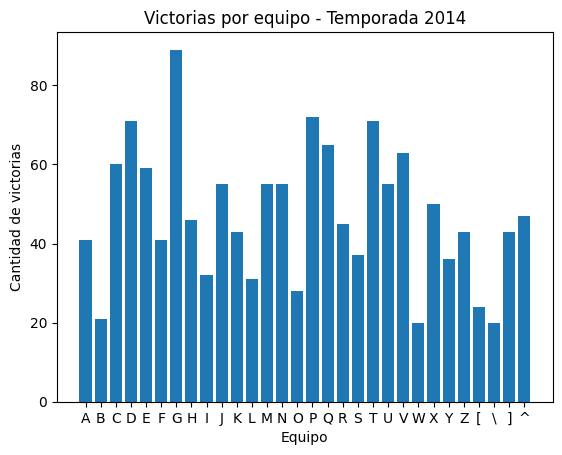

In [103]:
# Calcular la cantidad de victorias por equipo en cada temporada
victorias_por_equipo = df.groupby(["SEASON", "TEAM_ID_home"])["HOME_TEAM_WINS"].sum() + df.groupby(["SEASON", "TEAM_ID_away"])["HOME_TEAM_WINS"].apply(lambda x: len(x) - sum(x))
# Crear un DataFrame para almacenar el equipo de mayor puntaje en cada temporada
equipo_mayor_puntaje = pd.DataFrame(columns=["SEASON", "TEAM_ID"])

# Crear un gráfico de barras para cada temporada
for temporada in df["SEASON"].unique():
    victorias_temporada = victorias_por_equipo.loc[temporada]
    equipos = victorias_temporada.index
    cantidad_victorias = victorias_temporada.values
    equipo_mayor_puntaje_temporada = victorias_temporada.idxmax()
    equipo_mayor_puntaje = equipo_mayor_puntaje.append({"SEASON": temporada, "TEAM_ID": equipo_mayor_puntaje_temporada}, ignore_index=True)
    plt.bar(equipos, cantidad_victorias)
    plt.title(f"Victorias por equipo - Temporada {temporada}")
    plt.xlabel("Equipo")
    plt.ylabel("Cantidad de victorias")
    plt.show()

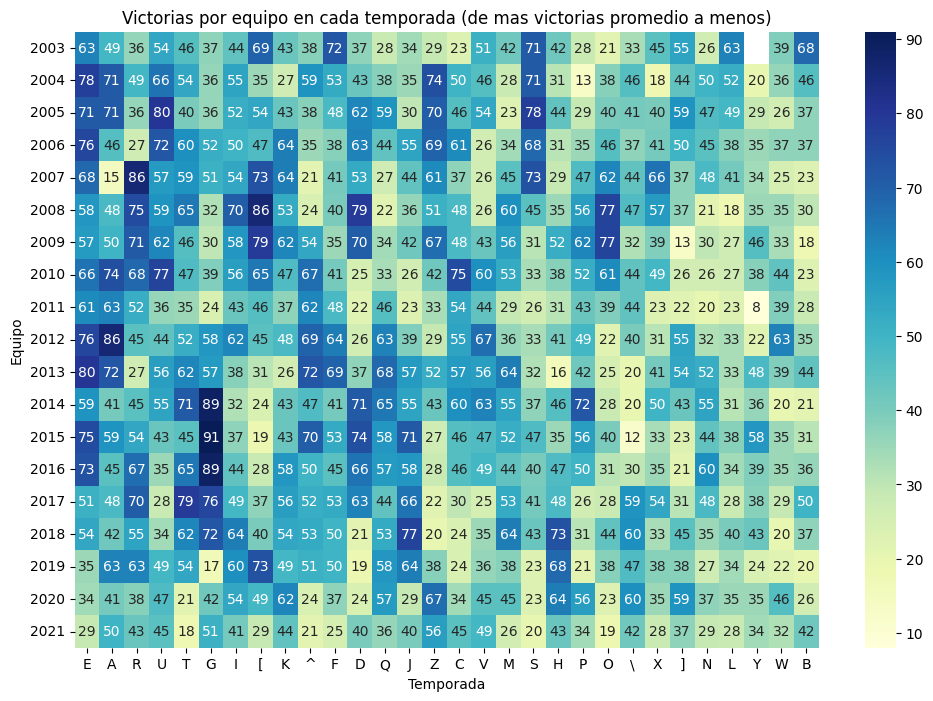

In [104]:
# Calcular la cantidad de victorias por equipo en cada temporada
victorias_por_equipo = df.groupby(["SEASON", "TEAM_ID_home"])["HOME_TEAM_WINS"].sum() + df.groupby(["SEASON", "TEAM_ID_away"])["HOME_TEAM_WINS"].apply(lambda x: len(x) - sum(x))
# Calcular el promedio de victorias por equipo
promedio_victorias_por_equipo = victorias_por_equipo.groupby("TEAM_ID_home").mean()
# Ordenar los equipos por el promedio de victorias de mayor a menor
equipos_ordenados = promedio_victorias_por_equipo.sort_values(ascending=False).index
# Crear una tabla pivote con las victorias por equipo en cada temporada, ordenada según los equipos_ordenados
pivot_table = victorias_por_equipo.unstack()
# Reordenar las columnas de la tabla pivote según los equipos_ordenados
pivot_table = pivot_table[equipos_ordenados]
# Crear un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Victorias por equipo en cada temporada (de mas victorias promedio a menos)")
plt.xlabel("Temporada")
plt.ylabel("Equipo")
plt.show()

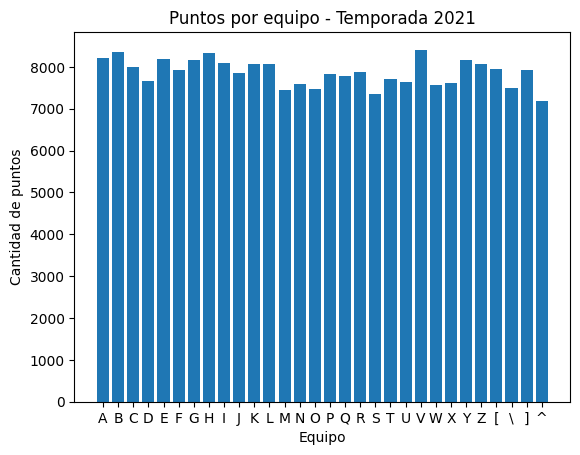

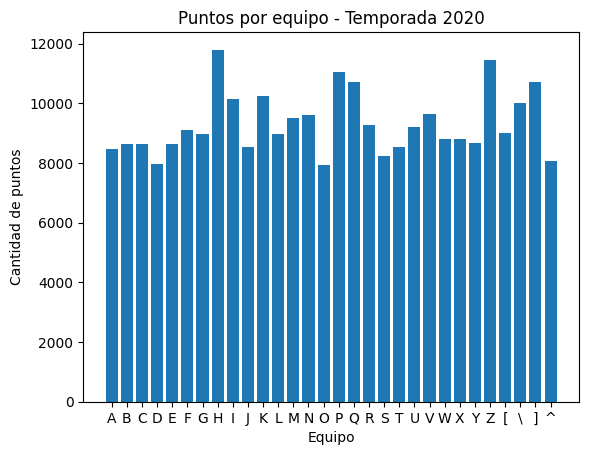

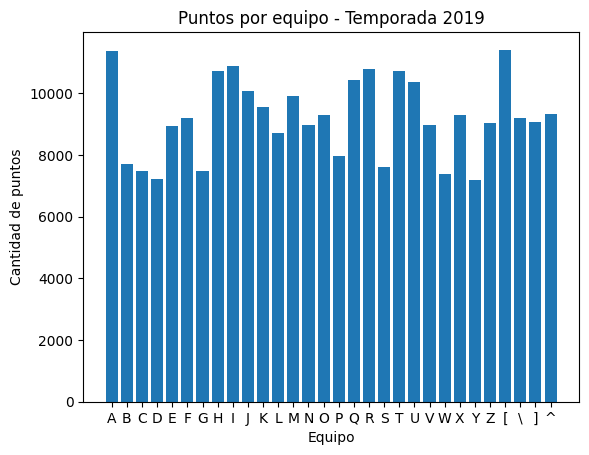

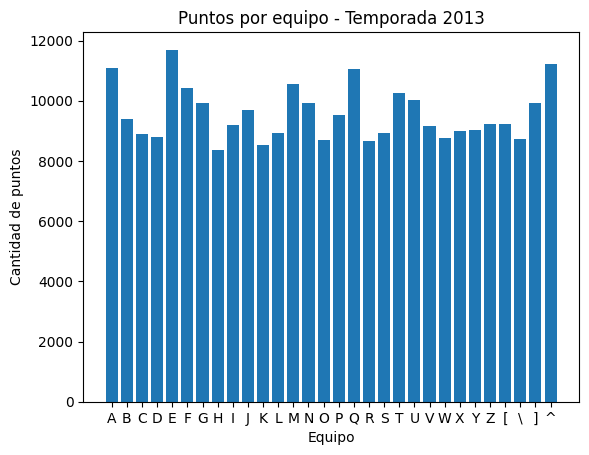

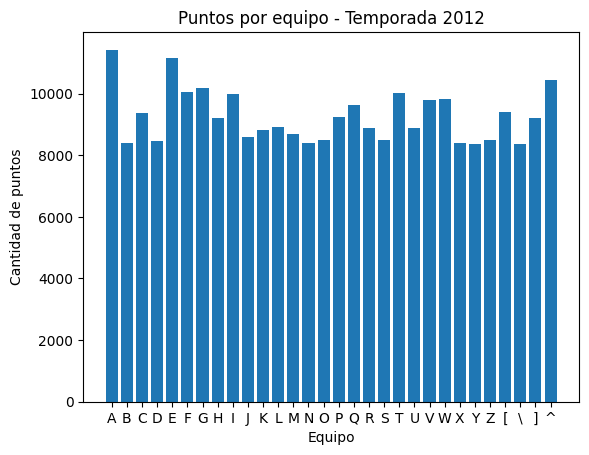

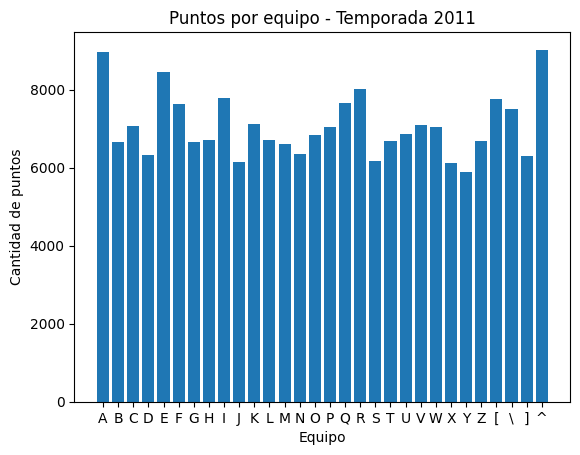

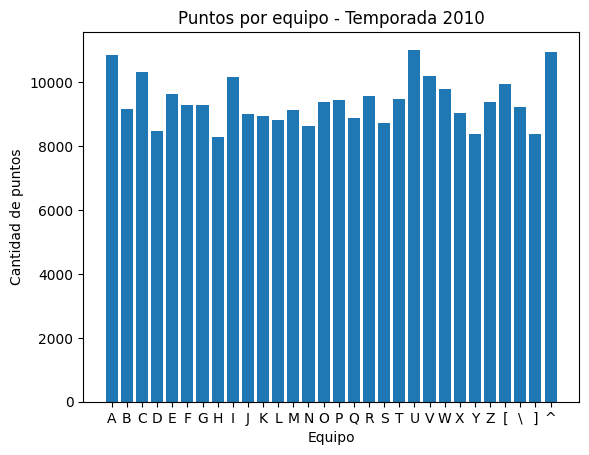

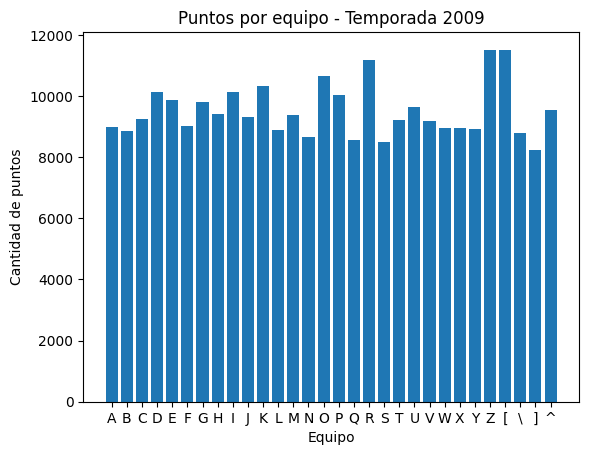

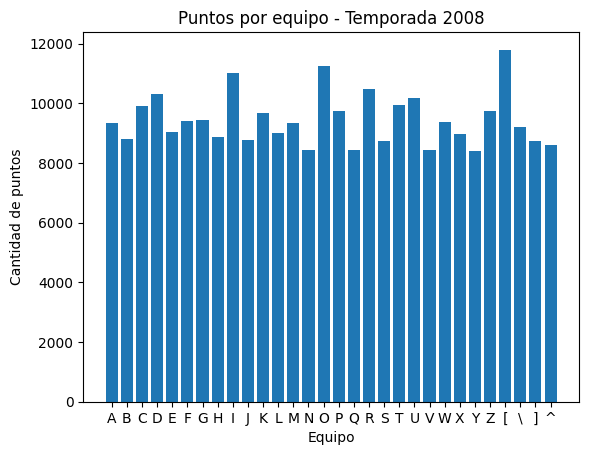

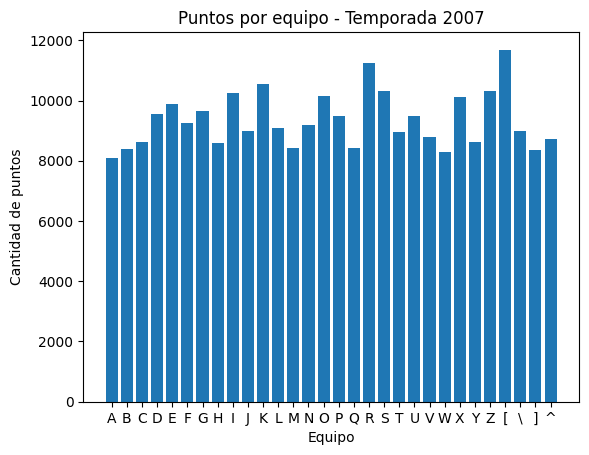

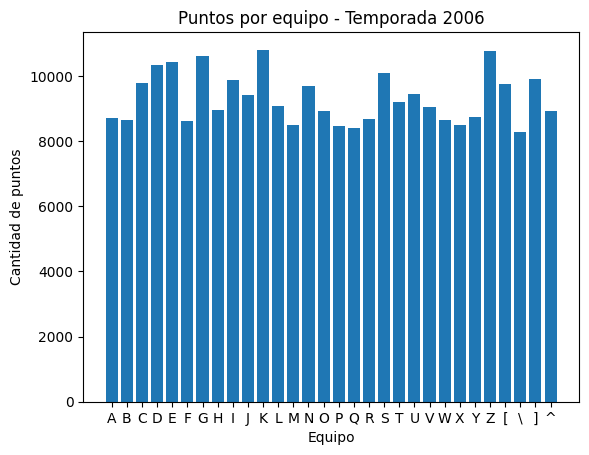

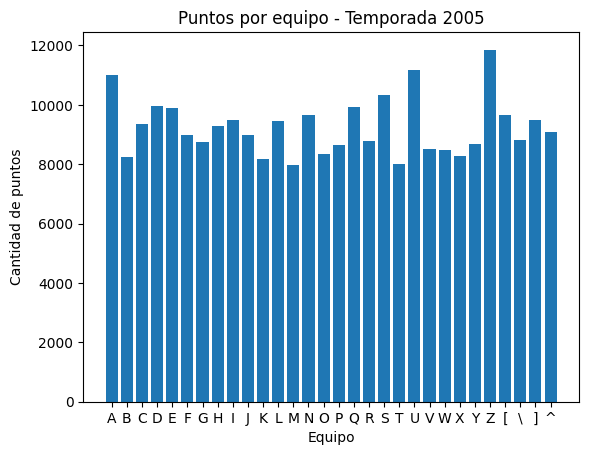

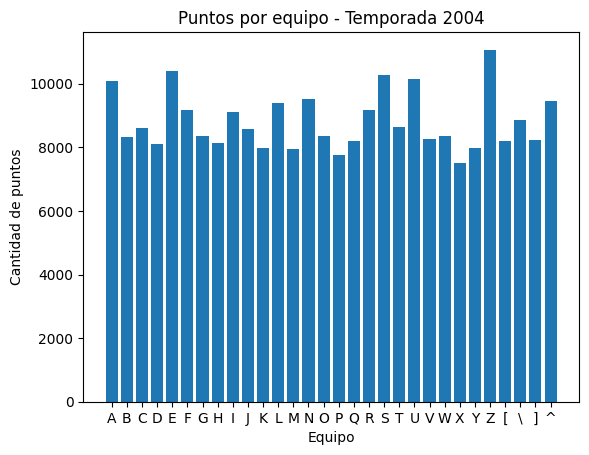

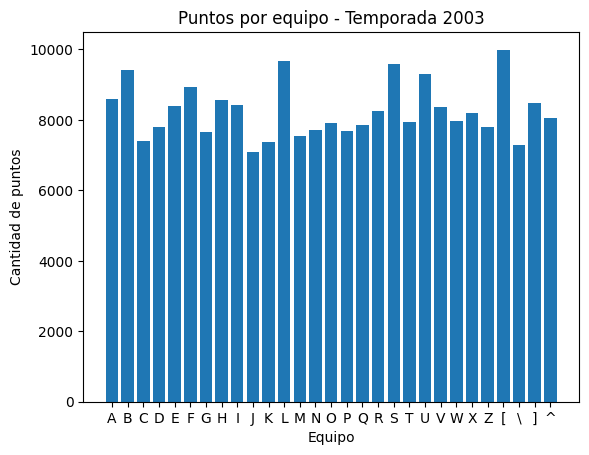

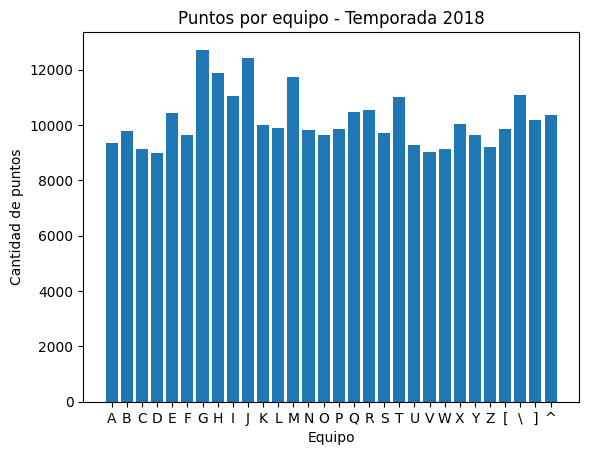

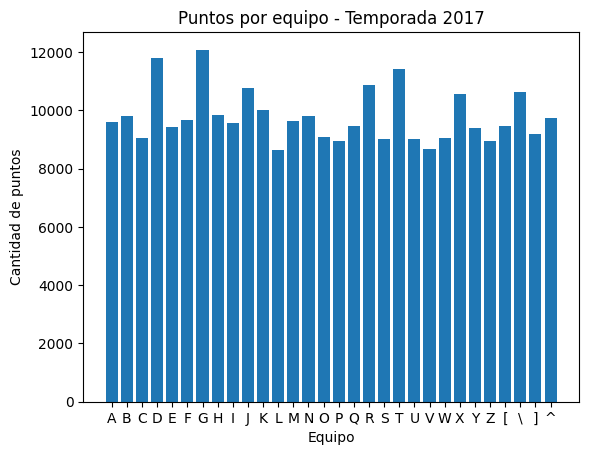

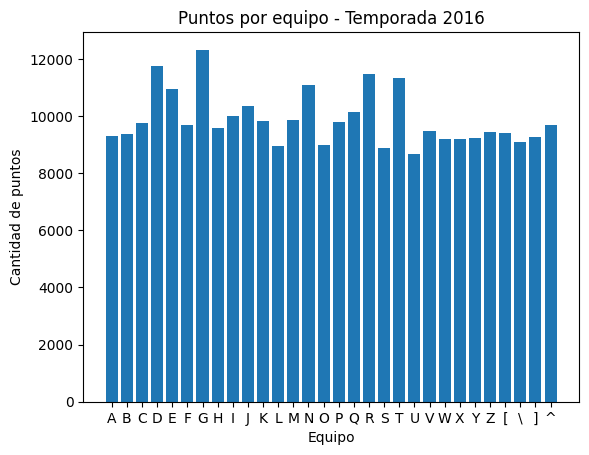

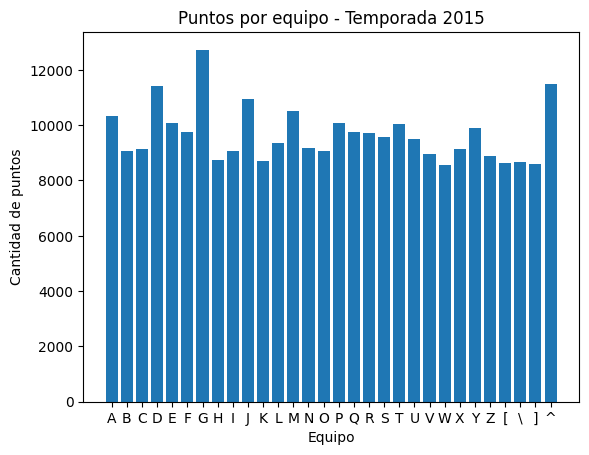

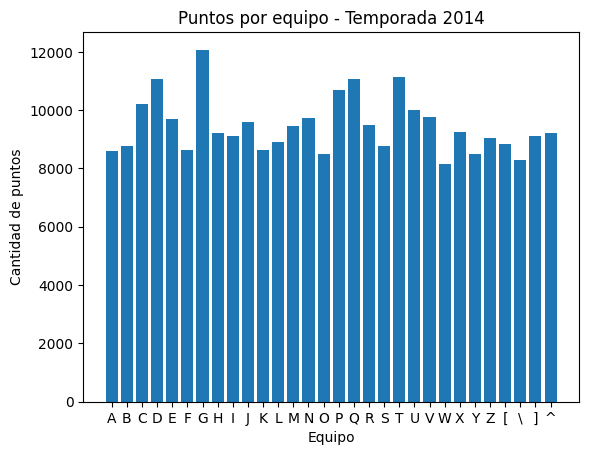

In [105]:
# Calcular la suma de puntos por equipo en cada temporada
puntos_por_equipo = df.groupby(["SEASON", "TEAM_ID_home"])["PTS_home"].sum() + df.groupby(["SEASON", "TEAM_ID_away"])["PTS_away"].sum()

# Crear un gráfico de barras para cada temporada
for temporada in df["SEASON"].unique():
    puntos_temporada = puntos_por_equipo.loc[temporada]
    equipos = puntos_temporada.index
    cantidad_puntos = puntos_temporada.values
  
    plt.bar(equipos, cantidad_puntos)
    plt.title(f"Puntos por equipo - Temporada {temporada}")
    plt.xlabel("Equipo")
    plt.ylabel("Cantidad de puntos")
    plt.show()

No es posible analizar una comparacion por variables de tipo "string" o de tipo "integer". 
Por lo tanto , se hara una pequeña practica para demostrar que al menos siguen un patron, empezando con la muestra de los ganadores por temporada.

In [114]:
equipo_mayor_puntaje=equipo_mayor_puntaje.sort_values('SEASON')
equipo_mayor_puntaje

,SEASON,TEAM_ID
13,2003,F
12,2004,E
11,2005,U
10,2006,E
9,2007,R
8,2008,[
7,2009,[
6,2010,U
5,2011,A
4,2012,A


In [111]:
# Contar las repeticiones de cada valor en la columna 'TEAM_ID'
cantidad = equipo_mayor_puntaje['TEAM_ID'].value_counts()
equipos_no_ganadores = equipos[~equipos.isin(equipo_mayor_puntaje['TEAM_ID'])]
veces_ganador = pd.DataFrame({'TEAM_ID': cantidad.index, 'veces': cantidad.values})
#for equip in equipos_no_ganadores.values :
#    veces_ganador=veces_ganador.append({'TEAM_ID': equip, 'veces': 0},ignore_index=True)
veces_ganador

,TEAM_ID,veces
0,[,3
1,E,3
2,G,3
3,Z,2
4,A,2
5,U,2
6,R,1
7,F,1
8,J,1
9,T,1


Esto significa que de los 10 equipos que ganaron el campeonato , al menos 6 ganaron 2 veces y al menos 3 ganaron 3 veces

# Preguntas e Hipotesis:
Al ver la distribucion y los comportamientos de los datos en los graficos , se pueden sacar algunas conclusiones:

## Planteamiento primer hipotesis

**¿Se puede demostrar que un equipo tiene mejor rendimiento que los demas?**

En la practica diaria se le da la posibilidad a todos los equipos de que puedan obtener la victoria a final de temporada. Sin embargo, los mismos jugadores , equipos tecnicos y fans de estos clubes saben que esto no estan real y se sabe casi a priori cuales tienen mas chances en base a lo que a pasado años anteriores.
Por eso, planteamos que la probabilidad de que un equipo gane el campeonato es la misma para todos y la comparamos con la probabilidad de los equipos que mas ganaron el campeonato .

Hipótesis Nula: No hay diferencia estadistica entre las frecuencias de los equipos ganadores , todos ganan con la misma probabilidad.

Hipótesis Alternativa: Existe diferencia significativa entre las frecuencias de los equipos ganadores, los equipos ganadores se consideran con mayor posibilidades de ganar el campeonato.

In [109]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
# Se realizara una prueba de hipotesis de chi-cuadrado para demostrar la diferenc
# Se arma un arreglo en base a las frecuencias de equipos ganadores de cada temporada
# para poder ingresarlo en el 
arreglo_veces_ganador= veces_ganador['veces'].values

# Realizar la prueba de chi-cuadrada
chi2_stat, p_val = chisquare(arreglo_veces_ganador)

# imprimir los resultados
print("Estadística chi-cuadrado: ",chi2_stat)
print("Valor p: ", p_val)

#Se establece un valor de confianza para ver cual es la diferencia que debe haber para concluir ante una diferencia de medias
confidence = 0.95
significance = 1-confidence
print('Nuestro valor de confianza es de {}% , su nivel de significancia es de {}%, el valor p dado es de {}'.format(round((confidence*100),2),round((significance*100),2),p_val*10))
if p_val>significance:
    print(f'Se rechaza H1 ,se acepta se acepta H0 ({p_val}>{significance})')
else:
    print(f'Se rechaza H0 , se acepta H1 ({p_val}<{significance})')

Estadística chi-cuadrado:  48.89473684210526
Valor p:  0.01184779193953058
Nuestro valor de confianza es de 95.0% , su nivel de significancia es de 5.0%, el valor p dado es de 0.1184779193953058
Se rechaza H0 , se acepta H1 (0.01184779193953058<0.050000000000000044)


Mediante esta prueba , se puede notar una verdadera diferencia de posibilidades en ganar el campeonato en base a la informacion de datos pasados. 

## Planteamiento segunda hipotesis

**¿Se puede demostrar que un equipo tiene mismo/similar rendimiento que la temporada pasada?**

Como hipotesis se plantea que un equipo es regularmente equilibrado y con una estrategia propia pero balanceada. Aunque los jugadores y las situaciones del club cambien, los DT´s seran los encargados de realizar una tarea de investigacion de jugadores para que presenten las caracteristicas apropiadas para mantener la forma del equipo. 

Asi , planteamos la probabilidad de que un equipo gane la proxima temporada porque finalizo ganando la ultima. Para esto se puede estimar la proporcion de veces en las que los equipos ganaron consecutivamente. Se podria decir que cuando mas veces se repite este suceso, mas comun es que suceda y la probabilidad de que continue sucediendo tambein aumentaria.

In [ ]:
veces_ganador_consecutivas = pd.DataFrame(columns=['TEAM_ID', 'veces_consecutivas'])
veces = 0

for i in range(len(equipo_mayor_puntaje)):
    if i < len(equipo_mayor_puntaje) - 1 and equipo_mayor_puntaje.iloc[i].loc['TEAM_ID'] == equipo_mayor_puntaje.iloc[i + 1].loc['TEAM_ID']:
        veces += 1
    else:
        equipo_id = equipo_mayor_puntaje.iloc[i].loc['TEAM_ID']
        veces_ganador_consecutivas = veces_ganador_consecutivas.append({'TEAM_ID': equipo_id, 'veces_consecutivas': veces}, ignore_index=True)
        veces = 0

veces_ganador_consecutivas = veces_ganador_consecutivas.astype({'veces_consecutivas': int})
veces_ganador_consecutivas = veces_ganador_consecutivas.groupby('TEAM_ID').sum().reset_index()
veces_ganador_consecutivas

,TEAM_ID,veces_consecutivas
0,A,1
1,E,0
2,F,0
3,G,2
4,J,0
5,R,0
6,T,0
7,U,0
8,Z,1
9,[,1


Como se puede ver en la tabla solo un equipo ['G'] gano 2 veces consecutivas , y 3 ganaron 1 vez consecutiva. 
Esta informacion es la que nos permite determinar una proporcion de que continue sucediendo esta situacion en futuras ocaciones

In [120]:
# Cantidad de veces que hubo victorias consecutivas
ganadas_consecutivas=5
# Se considera una temporada menos ya debe verificarse con la temporada actual y la proxima
temporadas = 17
proporcion = ganadas_consecutivas/temporadas
print(f'La proporcion de ganadas consecutivas es de :',round(proporcion,2))

La proporcion de ganadas consecutivas es de : 0.29


Este resultado , nos estima que existe una probabilidad del 29% de que un equipo gane la proxima temporada si gano la anterior. Si se toma un valor de significancia del 50% , entonces se podria decir que la Hipotesis alternativa es Rechazada ya que no la supera.

# Conclusion de objetivo 

En base a los resultados de los graficos y las pruebas de hipotesis:

**La distribucion de los puntajes de locales agrupados y visitantes agrupados es similar**

**Cuando el local ganá, posee un porcentaje mayor de triples durante el partido**

**El equipo local tiene mayor probabilidad de anotar que el visitante**

**El equipo local tiene mayor probabilidad de ganar (del 60% aproximadamente)**
